288
nnz in A: 288
nnz in B: 544
nnz in C: 1256
time for ILU: 0.000997305
time for  LU: 0.000993013


C:\Users\aleix\AppData\Local\Temp\ipykernel_12484\3283955804.py:24: SparseEfficiencyWarning: spilu converted its input to CSC format
  B = sla.spilu(A, drop_tol=1e-12, fill_factor=1)#, permc_spec='NATURAL')
C:\Users\aleix\AppData\Local\Temp\ipykernel_12484\3283955804.py:28: SparseEfficiencyWarning: splu converted its input to CSC format
  C = sla.splu(A)#, permc_spec='NATURAL')


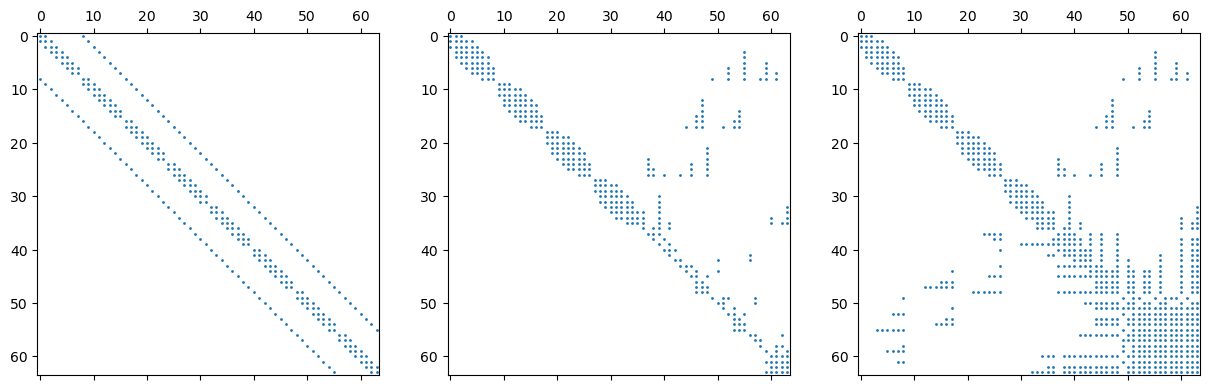

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pyamg
import scipy.sparse.linalg as sla
import numpy as np
import time

if 1:
    A = pyamg.gallery.poisson((8,8), format='csr')
    n = A.shape[0]
    b = np.ones((n,))
    x = A * b
    x0 = np.random.rand(n)
if 0:
    #A= sio.mmread('mesh_2d_h005.mtx.gz')
    A = sio.mmread('horseshoe_matrix_anisotropic.mtx.gz')
    n = A.shape[0]
    b = np.ones((n,))
    x = A * b
    x0 = np.random.rand(n)
print(A.nnz)

t = time.time()
B = sla.spilu(A, drop_tol=1e-12, fill_factor=1)#, permc_spec='NATURAL')
tilu = time.time() - t

t = time.time()
C = sla.splu(A)#, permc_spec='NATURAL')
tlu = time.time() - t

Mz = lambda r: B.solve(r)
Minv = sla.LinearOperator(A.shape, Mz)

print("nnz in A: %d"%A.nnz)
print("nnz in B: %d"%B.nnz)
print("nnz in C: %d"%C.nnz)
print("time for ILU: %g"%tilu)
print("time for  LU: %g"%tlu)

f, ax = plt.subplots(1, 3, figsize=(15,10))
ax[0].spy(A, marker='.', ms=2)
ax[1].spy(B.L + B.U, marker='.', ms=2)
ax[2].spy(C.L + C.U, marker='.', ms=2)

In [2]:
import matplotlib.pyplot as plt
import os

# Set up the figure with white background and black border
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Plot the sparsity pattern with custom markers and black squares
ax.spy(C.L + C.U, markersize=3, marker='x', color='black') # or "sy"


# Remove axis numbers
ax.xaxis.set_tick_params(labeltop=False)
ax.yaxis.set_tick_params(labelleft=False)

# Remove grid
ax.grid(False)

# Create folder for current method
folder_name = "plots"
plt.savefig(os.path.join(folder_name, "sparse.pdf"), dpi=600, bbox_inches='tight', pad_inches=0.1, format='pdf')

plt.close()

## MATRIX SPARSITY PATTERN (ARBITRARY MATRIX)

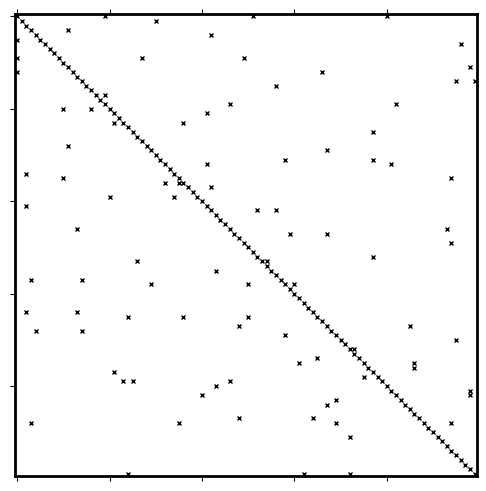

In [3]:
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt

random_state = 0
rng = np.random.RandomState(random_state)


n = 100
zero_prob = rng.uniform(0.985, 0.995)

nnz = int((1 - zero_prob) * n ** 2)
rows = [rng.randint(0, n) for _ in range(nnz)]
cols = [rng.randint(0, n) for _ in range(nnz)]

uniques = set(zip(rows, cols))  # Ensure we do not have repeated edges
rows, cols = zip(*uniques)

# Generate values for non-zero elements
vals = np.array([rng.normal(0, 1) for _ in cols])
A = coo_matrix((vals, (rows, cols)), shape=(n, n))

# Set diagonal elements to a random number different from 0
diag_indices = np.arange(n)
diag_vals = rng.normal(-2, 2, size=n)  # Random values for the diagonal elements
diag_vals[diag_vals == 0] = rng.normal(0.01, 1)  # Replace 0s with a different random number

# Ensure matrix is diagonally dominant
for i in range(n):
    off_diagonal_sum = np.sum(np.abs(A.data[(A.row == i) & (A.col != i)]))
    if np.abs(diag_vals[i]) <= off_diagonal_sum:
        diag_vals[i] = off_diagonal_sum + 0.1  # Ensuring diagonal dominance

A = A + coo_matrix((diag_vals, (diag_indices, diag_indices)), shape=(n, n))

A = coo_matrix(A)


import matplotlib.pyplot as plt

# Set up the figure with white background and black border
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Plot the sparsity pattern with custom markers and black squares
ax.spy(A, markersize=3, marker='x', color='black') # or "sy"


# Remove axis numbers
ax.xaxis.set_tick_params(labeltop=False)
ax.yaxis.set_tick_params(labelleft=False)

# Remove grid
ax.grid(False)

# Display the plot
plt.show()


In [4]:
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import scipy
import pyamg
import os
from scipy.sparse import csr_matrix, coo_matrix

n = 100
num_matrices = 1
total_nonzero_elements = 0

n = int(np.sqrt(n))


random_state = 3343
rng = np.random.RandomState(random_state)

A = pyamg.gallery.poisson((n, n))
A = csr_matrix(A)

# Find the non-zero elements in the matrix
non_zero_indices = A.nonzero()

num_non_zero_elements = len(non_zero_indices[0])

# Determine the number of elements to perturb
perturb_percentage = rng.uniform(0.99, 0.99)
num_elements_to_perturb = int(perturb_percentage * num_non_zero_elements)

# Select a random subset of the non-zero elements
selected_indices = rng.choice(num_non_zero_elements, num_elements_to_perturb, replace=False)

# Generate random values for the selected non-zero elements
perturbation_values = rng.normal(0, 1, size=num_elements_to_perturb)

# Perturb the selected non-zero elements with different random values
A.data[selected_indices] += perturbation_values

A = coo_matrix(A)


import matplotlib.pyplot as plt

# Set up the figure with white background and black border
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Plot the sparsity pattern with custom markers and black squares
ax.spy(A, markersize=3, marker='x', color='black') # or "sy"


# Remove axis numbers
ax.xaxis.set_tick_params(labeltop=False)
ax.yaxis.set_tick_params(labelleft=False)

# Remove grid
ax.grid(False)

# Create folder for current method
folder_name = "plots"
plt.savefig(os.path.join(folder_name, "sparsityv1.pdf"), dpi=600, bbox_inches='tight', pad_inches=0.1, format='pdf')

plt.close()


In [5]:
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import scipy
import pyamg
import os
from scipy.sparse import csr_matrix, coo_matrix

n = 100
num_matrices = 1
total_nonzero_elements = 0

n = int(np.sqrt(n))


random_state = 3343
rng = np.random.RandomState(random_state)

A = pyamg.gallery.poisson((n, n))
A = csr_matrix(A)

# Find the non-zero elements in the matrix
non_zero_indices = A.nonzero()

num_non_zero_elements = len(non_zero_indices[0])

# Determine the number of elements to perturb
perturb_percentage = rng.uniform(0.99, 0.99)
num_elements_to_perturb = int(perturb_percentage * num_non_zero_elements)

# Select a random subset of the non-zero elements
selected_indices = rng.choice(num_non_zero_elements, num_elements_to_perturb, replace=False)

# Generate random values for the selected non-zero elements
perturbation_values = rng.normal(0, 1, size=num_elements_to_perturb)

# Perturb the selected non-zero elements with different random values
A.data[selected_indices] += perturbation_values

# Generate a random sparse matrix with a density between 0.5% and 2.5%
density = rng.uniform(0.005, 0.025)
random_sparse_matrix = scipy.sparse.random(A.shape[0], A.shape[1], density=density, format='csr', random_state=random_state)

# Add the random sparse matrix to A
A += random_sparse_matrix

A = coo_matrix(A)

import matplotlib.pyplot as plt

# Set up the figure with white background and black border
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Plot the sparsity pattern with custom markers and black squares
ax.spy(A, markersize=3, marker='x', color='black') # or "sy"


# Remove axis numbers
ax.xaxis.set_tick_params(labeltop=False)
ax.yaxis.set_tick_params(labelleft=False)

# Remove grid
ax.grid(False)

# Create folder for current method
folder_name = "plots"
plt.savefig(os.path.join(folder_name, "sparsityv2.pdf"), dpi=600, bbox_inches='tight', pad_inches=0.1, format='pdf')

plt.close()

## MATRIX SPARSITY PATTERN (SYMMETRIC)

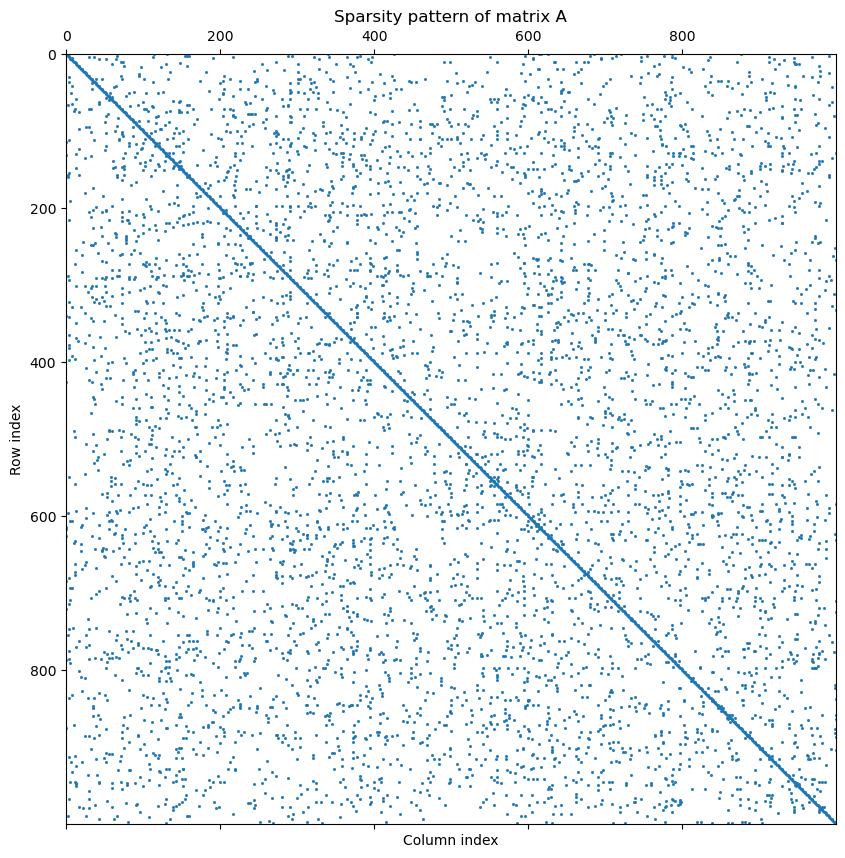

In [6]:
import scipy

random_state = 0
rng = np.random.RandomState(random_state)
alpha=1e-2

n = 1_000
zero_prob = rng.uniform(0.997, 0.998)

nnz = int((1 - zero_prob) * n ** 2)
rows = [rng.randint(0, n) for _ in range(nnz)]
cols = [rng.randint(0, n) for _ in range(nnz)]
    
uniques = set(zip(rows, cols))
rows, cols = zip(*uniques)
    
# generate values
vals = np.array([rng.normal(0, 1) for _ in cols])
M = coo_matrix((vals, (rows, cols)), shape=(n, n))
I = scipy.sparse.identity(n)
    
# create spd matrix
A = M @ M.T + alpha * I
    
# Plot the sparsity pattern of matrix A
plt.figure(figsize=(10, 10))
plt.spy(A, markersize=1)
plt.title("Sparsity pattern of matrix A")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

In [7]:
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
import numpy as np
def discretise_poisson(N):
    """Generate the matrix and rhs associated with the discrete Poisson operator."""
    
    nelements = 5 * N**2 - 16 * N + 16
    
    row_ind = np.empty(nelements, dtype=np.float64)
    col_ind = np.empty(nelements, dtype=np.float64)
    data = np.empty(nelements, dtype=np.float64)
    
    f = np.empty(N * N, dtype=np.float64)
    
    count = 0
    for j in range(N):
        for i in range(N):
            if i == 0 or i == N - 1 or j == 0 or j == N - 1:
                row_ind[count] = col_ind[count] = j * N + i
                data[count] =  1
                f[j * N + i] = 0
                count += 1
                
            else:
                row_ind[count : count + 5] = j * N + i
                col_ind[count] = j * N + i
                col_ind[count + 1] = j * N + i + 1
                col_ind[count + 2] = j * N + i - 1
                col_ind[count + 3] = (j + 1) * N + i
                col_ind[count + 4] = (j - 1) * N + i
                                
                data[count] = 4 * (N - 1)**2
                data[count + 1 : count + 5] = - (N - 1)**2
                f[j * N + i] = 1
                
                count += 5
                                                
    return coo_matrix((data, (row_ind, col_ind)), shape=(N**2, N**2)), f

C:\Users\aleix\AppData\Local\Temp\ipykernel_12484\1508655417.py:11: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  sol = spsolve(A, f)


(10000, 10000) (10000,)


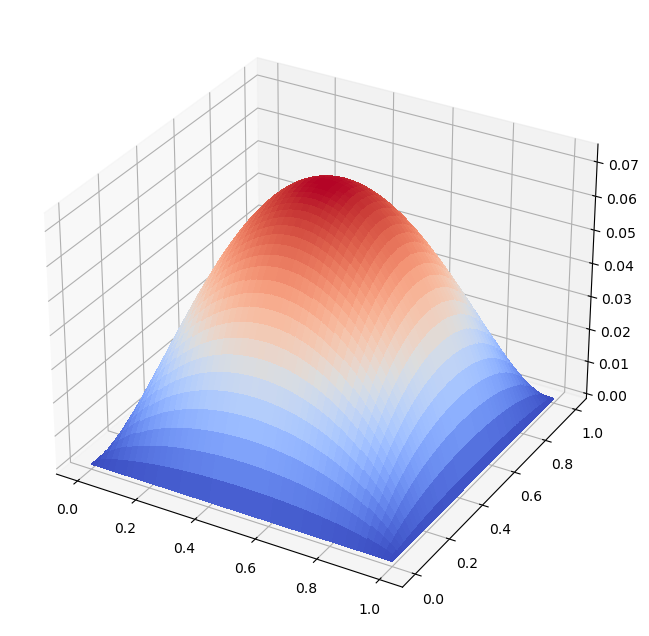

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from scipy.sparse.linalg import spsolve

N = 100

A, f = discretise_poisson(N)
sol = spsolve(A, f)


print(A.shape, f.shape)

u = sol.reshape((N, N))


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ticks= np.linspace(0, 1, N)
X, Y = np.meshgrid(ticks, ticks)
surf = ax.plot_surface(X, Y, u, antialiased=False, cmap=cm.coolwarm)
plt.show()

In [9]:
A = csr_matrix(A)

nbytes = A.data.nbytes + A.indices.nbytes + A.indptr.nbytes
print(f"The matrix A uses {round(nbytes / 1024**2, 2)} MB Ram.")

The matrix A uses 0.59 MB Ram.


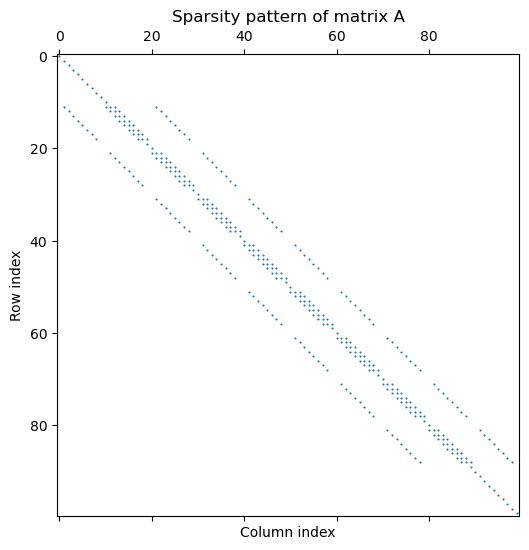

In [10]:
import matplotlib.pyplot as plt

N = 10

A, _ = discretise_poisson(N)

# Plot the sparsity pattern of matrix A
plt.figure(figsize=(6, 6))
plt.spy(A, markersize=0.5)
plt.title("Sparsity pattern of matrix A")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

In [11]:
import numpy as np
from scipy.sparse import csr_matrix

A = csr_matrix(A)

def is_symmetric_csr(matrix):
    """
    Check if a matrix in CSR format is symmetric.

    Args:
        matrix (csr_matrix): The input matrix in CSR format.

    Returns:
        bool: True if the matrix is symmetric, False otherwise.
    """
    # Convert CSR matrix to dense matrix
    dense_matrix = matrix.toarray()

    print(dense_matrix)

    # Check if the dense matrix is symmetric
    return np.array_equal(dense_matrix, dense_matrix.T)

# Example usage:

print(is_symmetric_csr(A))  # Output: False


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
False
